# Chapter 5 - Scale-free networks

# 5.1 Zipf's Law

Zipf’s law describes a relationship between the frequencies and ranks of words in natural
languages; see http://en.wikipedia.org/wiki/Zipf's_law. The “frequency” of a word
is the number of times it appears in a body of work. The “rank” of a word is its position in
a list of words sorted by frequency: the most common word has rank 1, the second most
common has rank 2, etc.

Specifically, Zipf’s Law predicts that the frequency, f , of the word with rank r is:

\begin{equation}
f = cr^{-s}
\end{equation}

where $s$ and $c$ are parameters that depend on the language and the text. 

If you take the logarithm of both sides of this equation, you get: 

\begin{equation}
log f = logc - slog r
\end{equation}

Plotting $log f$ versus $log r$, you should get a straight line with slope $-s$ and intercept $c$.

In [113]:
# Exercise 5.1 
'''
Write a program that reads a text from a file, counts word frequencies, and prints one line for each word, in descending 
order of frequency. You can test it by downloading an out-of-copyright book in plain text format from gutenberg.net. You
might want to remove punctuation from the words. 
'''
import matplotlib.pyplot as pyplot

# word list extraction from the book text file
f = open('data/alicesadventure2.txt','r')
wordlist = []
for x in f:
    line = x.split(' ')
    for word in line: 
        # removal of punctuation from the words (brute)
        word = word.lower()
        word = word.replace('\n','')
        word = word.replace(',','')
        word = word.replace('?','')
        word = word.replace('!','')
        word = word.replace('‘','')
        word = word.replace('’','')
        word = word.replace('(','')
        word = word.replace(')','')
        word = word.replace('.','')
        word = word.replace('--','')
        if len(word) > 0:
            wordlist.append(word)
            
# word counting 
wordict = {}
for w in wordlist: 
    if w not in wordict.keys():
        wordict.update({w:1})
    else:
        value = wordict[w] + 1
        wordict[w] = value
        
# ranking a dictionary
ranklist = sorted(wordict, key=wordict.get, reverse=True)
freq = []
for word in ranklist:
    freq.append(wordict[word])

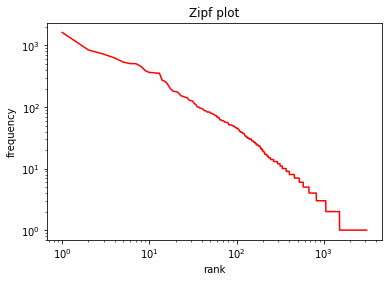

In [124]:
import math

rf = [(r+1,f) for r,f in enumerate(freq)]

rs, fs = zip(*rf)
pyplot.clf()

pyplot.title('Zipf plot')
pyplot.xlabel('rank')
pyplot.ylabel('frequency')
pyplot.plot(rs, fs, 'r-')

scale = 'log'
pyplot.xscale(scale)
pyplot.yscale(scale)
pyplot.show()

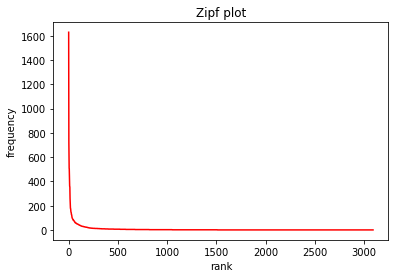

In [119]:
rf = [(r+1,f) for r,f in enumerate(freq)]

rs, fs = zip(*rf)
pyplot.clf()

pyplot.title('Zipf plot')
pyplot.xlabel('rank')
pyplot.ylabel('frequency')
pyplot.plot(rs, fs, 'r-')
pyplot.show()

# 5.2 Cumulative Distribution

A **distribution** is a statistical description of a set of values.

**Cumulative distribution function** (CDF), maps a value $x$, to the fraction of values less than or equal to x. If you choose a value at random, $CDF(x)$ is the probability that the value you get is less than or equal to x. 

In [139]:
x = [1,2,2,4,5]

def cdf(y,x):
    ctr = 0
    for i in y:
        if i <= x:
            ctr = ctr + 1
    return ctr/len(y)

In [140]:
cdfdist = []
for j in x:
    cdfdist.append((j,cdf(x,j)))

In [141]:
cdfdist

[(1, 0.2), (2, 0.6), (2, 0.6), (4, 0.8), (5, 1.0)]

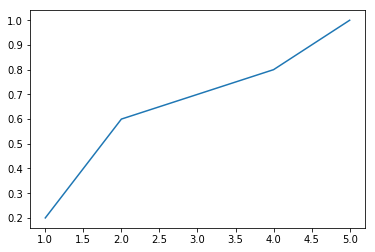

In [142]:
x, y = zip(*cdfdist)

pyplot.plot(x,y)

# 5.3 Continuous Distributions

# 5.4 Pareto Distributions

# 5.5 Barabasi and Albert

They also propose a model that generates random graphs with the same property. The
essential features of the model, which distinguish it from the Erd˝os-Rényi model and the
Watts-Strogatz model, are:
Growth: Instead of starting with a fixed number of vertices, Barabási and Albert start with
a small graph and add vertices gradually.

Preferential attachment: When a new edge is created, it is more likely to connect to a
vertex that already has a large number of edges. This “rich get richer” effect is characteristic of the growth patterns of some real-world networks.

Finally, they show that graphs generated by this model have a distribution of degrees
that obeys a power law. Graphs that have this property are sometimes called [scale-free
networks](http://en.wikipedia.org/wiki/Scale-free_network.). That name can be
confusing because it is the distribution of degrees that is scale-free, not the network.

# 5.6 Zipf, Pareto and Power laws

# 5.7 Explanatory Models

![](img\explanatory.png)

The logical structure of an explanatory model is:
1. In a system, S, we see something observable, O, that warrants explanation.
2. We construct a model, M, that is analogous to the system; that is, there is a correspondence between the elements of the model and the elements of the system.
3. By simulation or mathematical derivation, we show that the model exhibits a behavior, B, that is analogous to O.
4. We conclude that S exhibits O because S is similar to M, M exhibits B, and B is similar
to O.
